# Gradient Boosting Machines (GBM)

## Description:
 Gradient Boosting Machines are powerful ensemble techniques known for their high effectiveness in classification and regression tasks. They build an ensemble of weak prediction models, typically decision trees, in a stage-wise fashion and optimize an arbitrary differentiable loss function.



In [5]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import helper

In [6]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


n_estimators: 1, RMSE: 1.4539817115590812
n_estimators: 2, RMSE: 1.3955829268988784
n_estimators: 3, RMSE: 1.3386242405957143
n_estimators: 4, RMSE: 1.277645066827248
n_estimators: 5, RMSE: 1.2437707048632858
n_estimators: 6, RMSE: 1.2107361118697664
n_estimators: 7, RMSE: 1.186418634365294
n_estimators: 8, RMSE: 1.147910544034267
n_estimators: 9, RMSE: 1.1308674565127728
n_estimators: 10, RMSE: 1.1368505424094117
n_estimators: 11, RMSE: 1.0937874889237105
n_estimators: 12, RMSE: 1.081222756320641
n_estimators: 13, RMSE: 1.0668020855057216
n_estimators: 14, RMSE: 1.0573175830740016
n_estimators: 15, RMSE: 1.0402817356528384
n_estimators: 16, RMSE: 1.0309496692847901
n_estimators: 17, RMSE: 1.0059630599214497
n_estimators: 18, RMSE: 1.0016778850271448
n_estimators: 19, RMSE: 0.9974510044395821
n_estimators: 20, RMSE: 0.983608289166728
n_estimators: 21, RMSE: 0.980050206998069
n_estimators: 22, RMSE: 0.9654168002271435
n_estimators: 23, RMSE: 0.9590180780312775
n_estimators: 24, RMSE: 0.

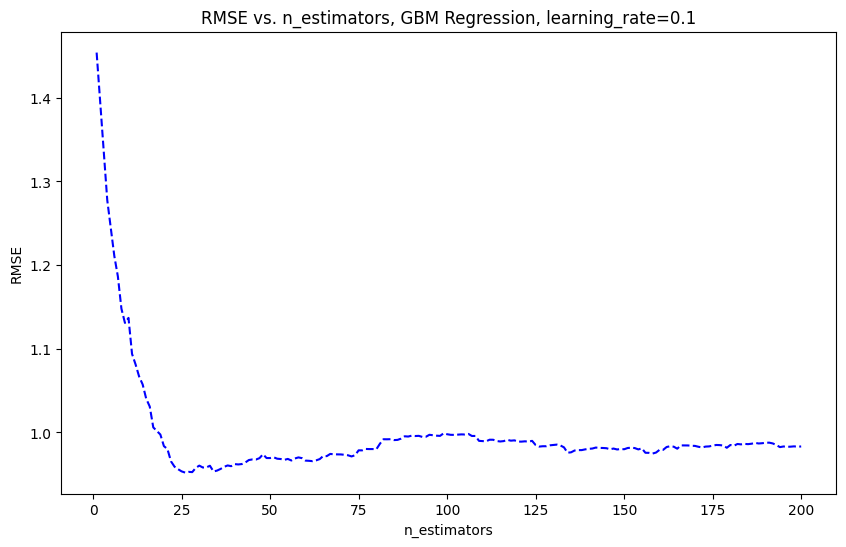

Best n_estimators: 26, RMSE: 0.9519523229791158


In [7]:


n_estimators = np.linspace(1, 200, 200, dtype=int)
results = []
best_estimator = 0
best_rmse = 0

if (1):
    for n in n_estimators:
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f'n_estimators: {n}, RMSE: {rmse}')
        results.append(rmse)
        if best_rmse == 0 or rmse < best_rmse:
            best_rmse = rmse
            best_estimator = n

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators, results, color='blue', linestyle='dashed', markersize=10)
    plt.title('RMSE vs. n_estimators, GBM Regression, learning_rate=0.1')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE')
    plt.show()
    print(f'Best n_estimators: {best_estimator}, RMSE: {best_rmse}')


rmse = 82416432.82697105
ratio
count    93.000000
mean      1.682021
std       2.315275
min       0.039265
25%       0.630002
50%       1.100525
75%       1.746279
max      17.221287
Name: revenue, dtype: float64
19.17 -> 18.77 -> 1.48
17.62 -> 16.81 -> 2.24
16.80 -> 17.05 -> 0.78
18.35 -> 17.67 -> 1.98
16.50 -> 18.03 -> 0.22
19.68 -> 18.90 -> 2.19
17.29 -> 17.31 -> 0.98
18.95 -> 18.03 -> 2.52
18.37 -> 17.84 -> 1.69
19.43 -> 18.81 -> 1.85


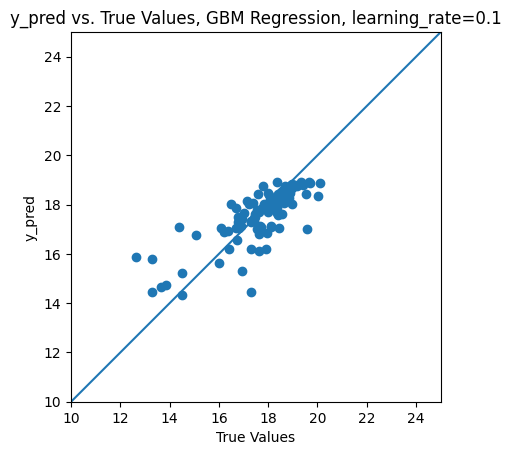

In [8]:
n = 24
model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp(y_pred)))
print(f'{rmse = }')

plt.scatter(y_test, y_pred)
plt.title('y_pred vs. True Values, GBM Regression, learning_rate=0.1')
plt.xlabel('True Values')
plt.ylabel('y_pred')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])


ratio = helper.revenue_exp(y_test) / helper.revenue_exp(y_pred)
print("ratio")
print(ratio.describe())

for i in range(10,20):
    print(f'{y_test.iloc[i]:.2f} -> {y_pred[i]:.2f} -> {ratio.iloc[i]:.2f}')